In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
feature = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
df_test= pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
submit = pd.read_csv("sampleSubmission.csv")

In [4]:
feature.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
feature.shape

(8190, 12)

In [6]:
df_train["Store"].max()

45

In [7]:
df_train["Store"].nunique()

45

In [8]:
df_train["Store"].nunique()

45

In [9]:
df_train["Dept"]

0          1
1          1
2          1
3          1
4          1
          ..
421565    98
421566    98
421567    98
421568    98
421569    98
Name: Dept, Length: 421570, dtype: int64

In [10]:
df_train["Store"].nunique()

45

In [11]:
df_train["Dept"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [12]:
df_train["Date"].min()

'2010-02-05'

In [13]:
df_train["Date"].max()

'2012-10-26'

In [14]:
df_train["Date"].min()

'2010-02-05'

In [15]:
df_test["Date"].max()

'2013-07-26'

In [16]:
df_test["Dept"].max()

99

## 学習データ
- 店舗データに関しては、1〜45の45店舗分
- カテゴリーデータにかんしては、1〜９９の８１カテゴリ分
- 2010-02-05-2012-10-26の１４３週間分
### テストデータ
- 2012-11-02~2013-07-26の39週間分

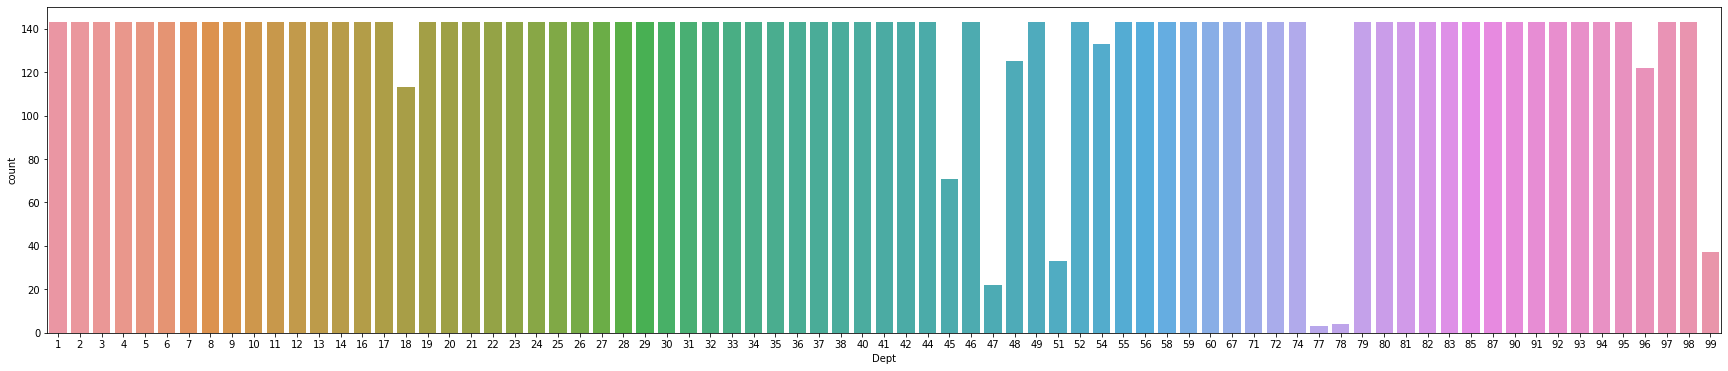

In [17]:
plt.figure(figsize=(30,6))
sns.countplot(x="Dept", data=df_train[df_train["Store"] == 1])
plt.show()

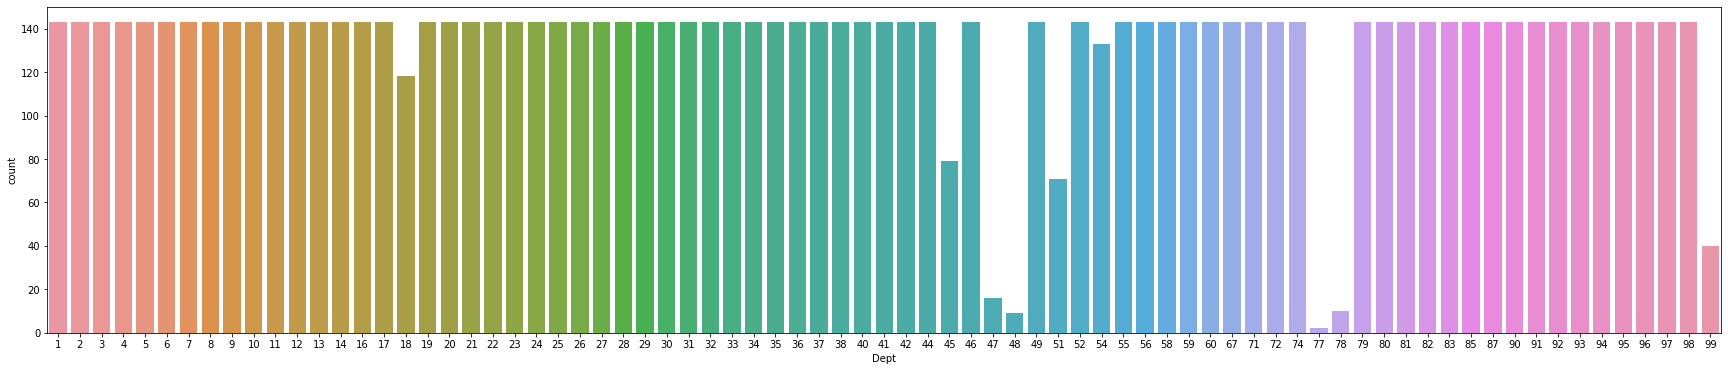

In [18]:
plt.figure(figsize=(30,6))
sns.countplot(x="Dept", data=df_train[df_train["Store"] == 32])
plt.show()

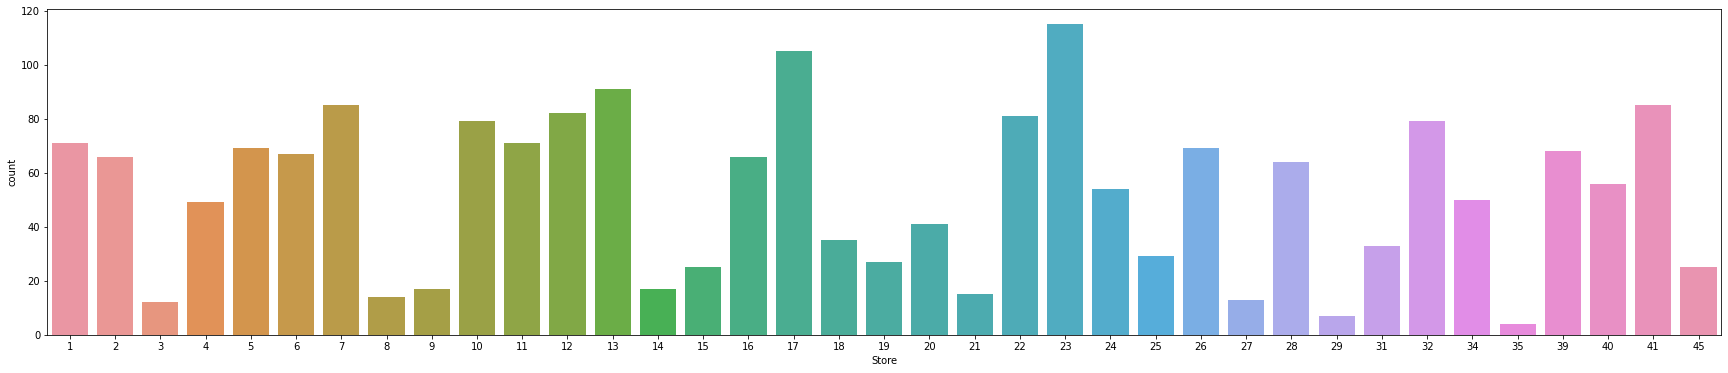

In [19]:
plt.figure(figsize=(30,6))
sns.countplot(x="Store", data=df_train[df_train["Dept"] == 45])
plt.show()

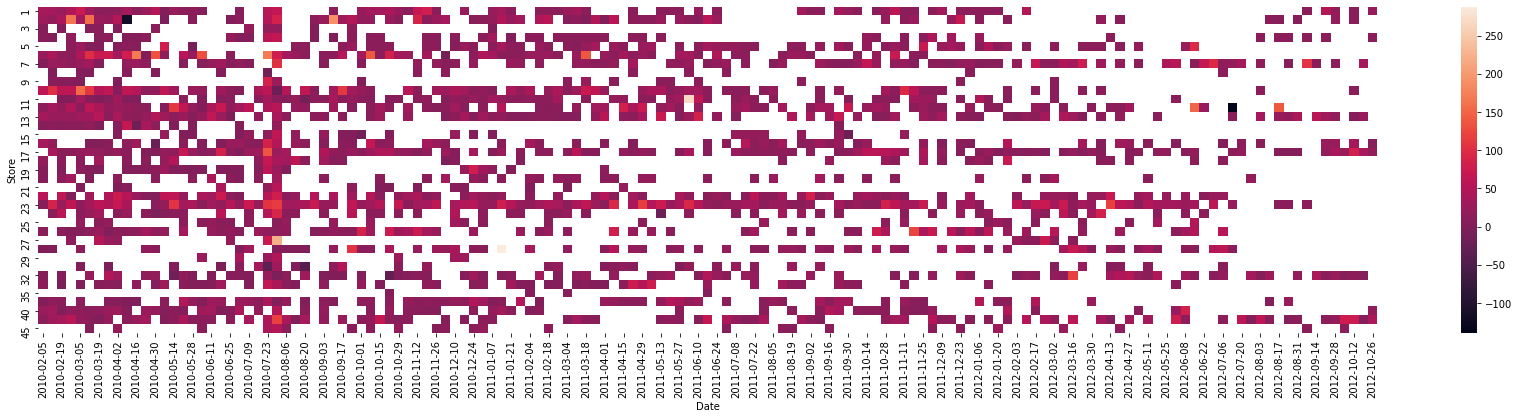

In [20]:
plt.figure(figsize=(30,6))
sns.heatmap(pd.pivot_table(df_train[df_train["Dept"] == 45], index="Store", columns="Date", values="Weekly_Sales"))
plt.show()

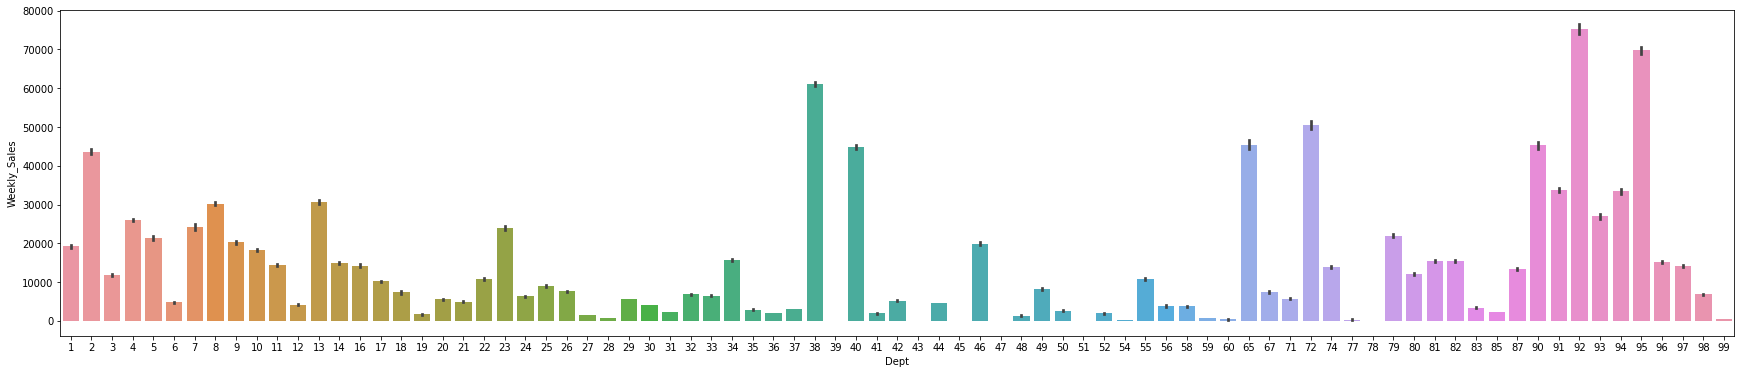

In [21]:
plt.figure(figsize=(30,6))
sns.barplot(x="Dept", y="Weekly_Sales", data=df_train)
plt.show()

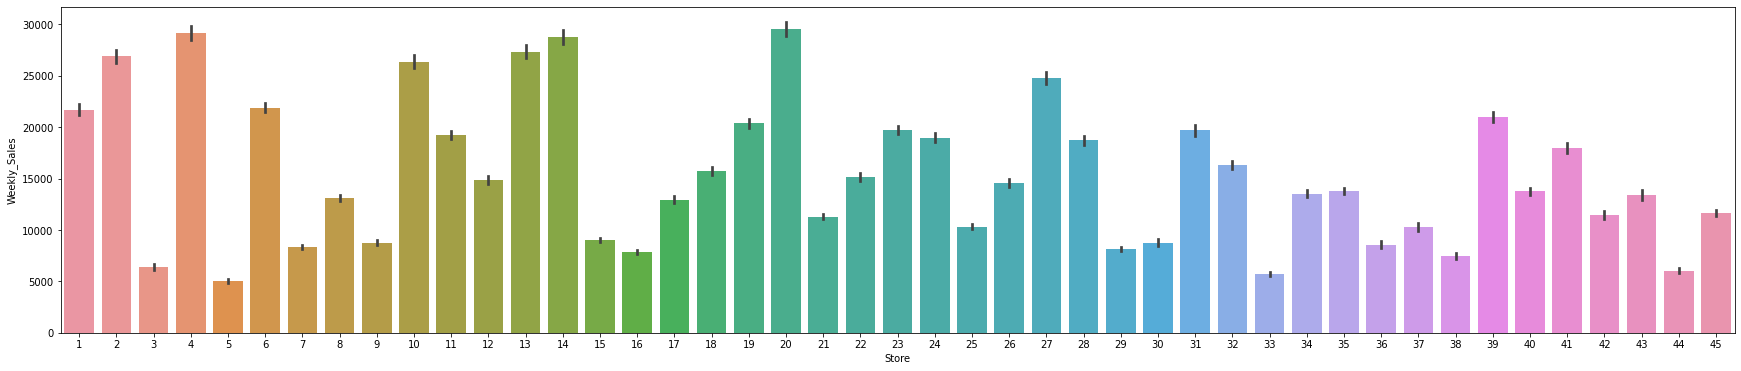

In [22]:
plt.figure(figsize=(30,6))
sns.barplot(x="Store", y="Weekly_Sales", data=df_train)
plt.show()

In [23]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


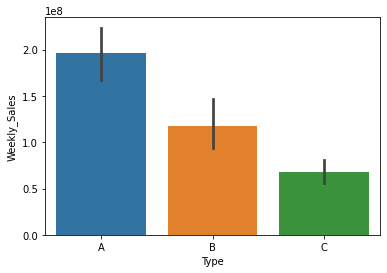

In [24]:
df_temp = pd.merge(df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index(), stores)
sns.barplot(x="Type", y="Weekly_Sales", data=df_temp)
plt.show()

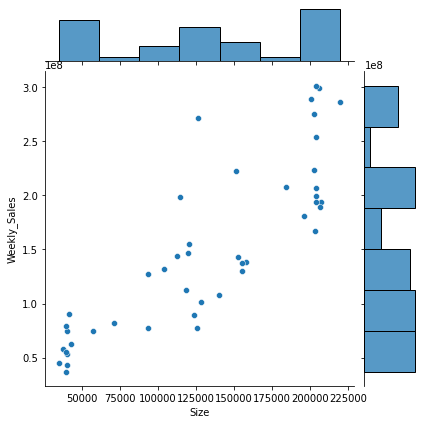

In [25]:
sns.jointplot(x="Size", y="Weekly_Sales", data=df_temp)
plt.show()

In [26]:
df_temp.corr()

,Store,Weekly_Sales,Size
Store,1.00000,-0.350100,-0.244270
Weekly_Sales,-0.35010,1.000000,0.846161
Size,-0.24427,0.846161,1.000000


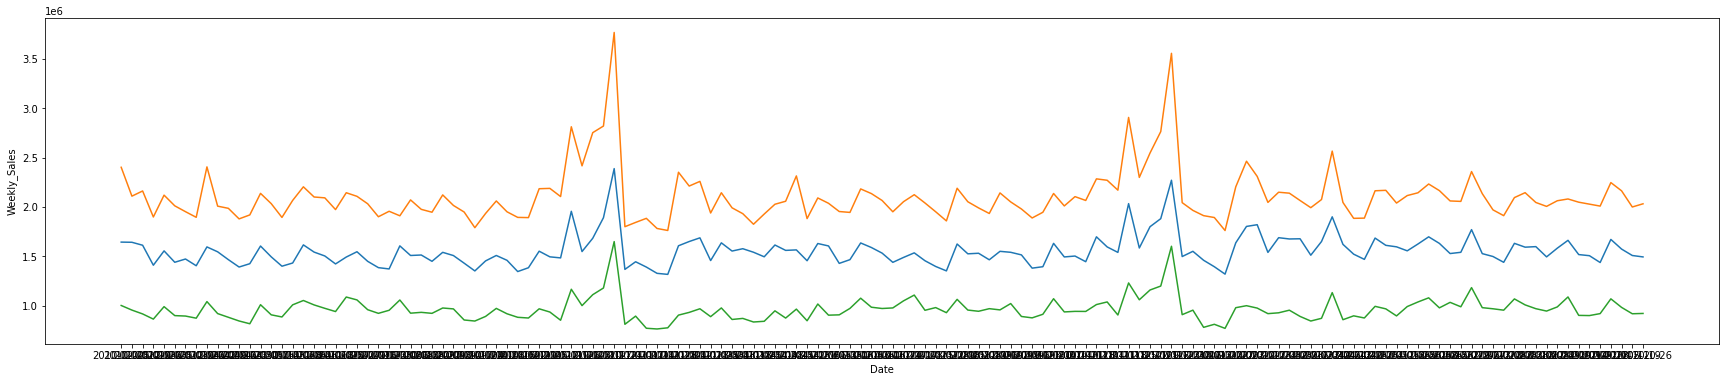

In [35]:
plt.figure(figsize=(30,6))
df_temp = df_train.groupby(["Date","Store"]).sum().reset_index()
sns.lineplot(x="Date", y="Weekly_Sales", data=df_temp[df_temp["Store"]==1])
sns.lineplot(x="Date", y="Weekly_Sales", data=df_temp[df_temp["Store"]==20])
sns.lineplot(x="Date", y="Weekly_Sales", data=df_temp[df_temp["Store"]==40])
plt.show()

In [37]:
df_temp = df_train.groupby(["Date"]).sum().reset_index()
df_temp.sort_values("Weekly_Sales", ascending=False).head(10)

,Date,Store,Dept,Weekly_Sales,IsHoliday
46,2010-12-24,65507,130460,80931415.60,0
98,2011-12-23,67073,135571,76998241.31,0
94,2011-11-25,66864,135801,66593605.26,3021
42,2010-11-26,65217,129373,65821003.24,2938
45,2010-12-17,65676,130438,61820799.85,0
97,2011-12-16,66894,134714,60085695.94,0
44,2010-12-10,65354,129960,55666770.39,0
96,2011-12-09,66809,134656,55561147.70,0
113,2012-04-06,66323,132587,53502315.87,0
126,2012-07-06,65939,132367,51253021.88,0
